# StackOverflow Survey Data Analysis

## A Look at the Data

In order to get a better understanding of the data, some of the characteristics of the dataset will be explored as follows.

1. Number of rows and columns in this dataset.
2. Provide a set of column names that have no missing values.
3. Which columns have the most missing values? Provide a set of column names that have more than 75% of their values missing.
4. Provide a pandas series of the different **Professional** status values in the dataset along with the count of the number of individuals with each status.
5. Provide a pandas series of the different FormalEducation status values in the dataset along with the count of how many individuals received that formal education.
6. Provide a pandas series of the different Country values in the dataset along with the count of how many individuals are from each country. 

In [17]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import helper as h

In [18]:
os.chdir("projects_on_GitHub/cases/SurveyDataAnalysis")

In [417]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [418]:
# 1. Number of rows and columns in the dataset
print("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1]))

There are 19102 rows and 154 columns in the dataset.


In [419]:
# 2. Provide a set of column names that have no missing values.
no_nulls = set(df.columns[df.isnull().sum()==0])
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [420]:
# Find columns with the most null values
na_max = df.isna().sum().max()
df.columns[df.isna().sum()==na_max]

Index(['ExCoderNotForMe', 'ExCoderWillNotCode'], dtype='object')

In [421]:
# For check purpose
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 154 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    Respondent                        19102 non-null  int64  
 1    Professional                      19102 non-null  object 
 2    ProgramHobby                      19102 non-null  object 
 3    Country                           19102 non-null  object 
 4    University                        19102 non-null  object 
 5    EmploymentStatus                  19102 non-null  object 
 6    FormalEducation                   19102 non-null  object 
 7    MajorUndergrad                    15899 non-null  object 
 8    HomeRemote                        16471 non-null  object 
 9    CompanySize                       14653 non-null  object 
 10   CompanyType                       14609 non-null  object 
 11   YearsProgram                      19005 non-null  ob

In [422]:
# 3. Provide a set of column names that have more than 75% of their values missing.
nulls_75plus = set(df.columns[df.isna().mean() >= .75])
nulls_75plus

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [423]:
# 4. Professional status value counts
## Check null values in `Professional` feature
df.Professional.isna().sum()

0

In [424]:
status_vals = df.Professional.value_counts(dropna=False, normalize=True, ascending=True)
status_vals

Used to be a professional developer                     0.018689
None of these                                           0.019265
Professional non-developer who sometimes writes code    0.093289
Student                                                 0.147681
Professional developer                                  0.721076
Name: Professional, dtype: float64

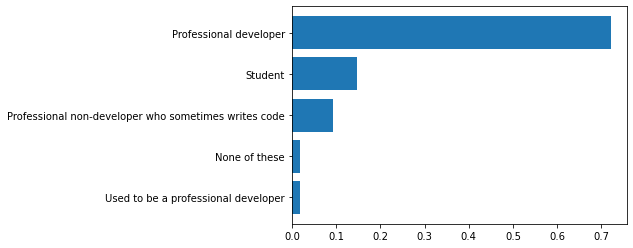

In [425]:
# Visualization for Q4
plt.barh(y=status_vals.index.values, width=status_vals.values);

In [426]:
# 5. `FormalEducation` value counts
## Check null values in `FormalEducation` feature
df.FormalEducation.isna().sum()

0

In [427]:
def viz_freq(feature_name, top_k=None, norm=None, asc=False):
    if top_k is None:
        val_counts = df[feature_name].value_counts(normalize=norm, ascending=asc)
        print(val_counts)
        plt.barh(y=val_counts.index.values, width=val_counts.values);
        
    else:
        val_counts = df[feature_name].value_counts(normalize=norm, ascending=asc)
        top_k_vals = val_counts[-top_k:]
        print(top_k_vals)
        plt.barh(y=top_k_vals.index.values, width=top_k_vals.values);

I never completed any formal education                               0.007591
Professional degree                                                  0.013349
Primary/elementary school                                            0.021150
I prefer not to answer                                               0.021411
Doctoral degree                                                      0.028845
Secondary school                                                     0.116585
Some college/university study without earning a bachelor's degree    0.150194
Master's degree                                                      0.216888
Bachelor's degree                                                    0.423987
Name: FormalEducation, dtype: float64


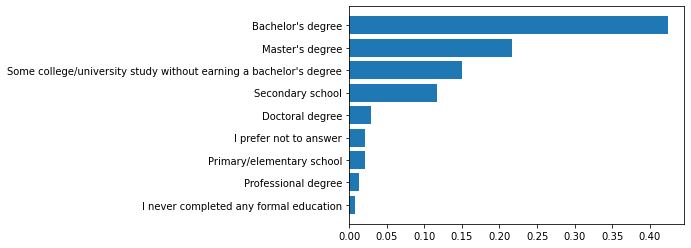

In [428]:
viz_freq("FormalEducation", norm=True, asc=True)

In [429]:
# 6. `Country` value counts
## Check null values in `FormalEducation` feature
df.Country.isna().sum()

0

Ivory Coast (Cote D'Ivoire)    0.000052
Qatar                          0.000052
Libya                          0.000052
Sudan                          0.000052
Vatican City State             0.000052
                                 ...   
Canada                         0.045754
Germany                        0.069993
United Kingdom                 0.074547
India                          0.081510
United States                  0.228458
Name: Country, Length: 165, dtype: float64


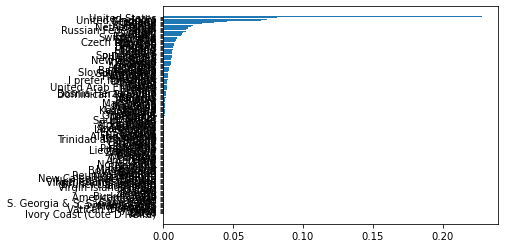

In [430]:
viz_freq("Country", norm=True, asc=True)

Israel            0.017694
Netherlands       0.019527
Australia         0.020888
France            0.027327
Poland            0.036331
Canada            0.045754
Germany           0.069993
United Kingdom    0.074547
India             0.081510
United States     0.228458
Name: Country, dtype: float64


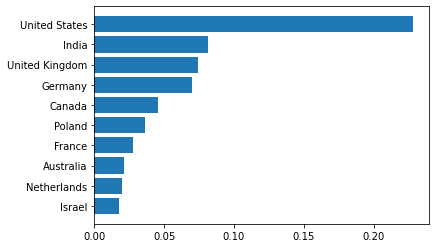

In [431]:
viz_freq("Country", top_k=10, norm=True, asc=True)

___I wrap the function above in a `helper.py` script under root folder.___

Used to be a professional developer                     0.018689
None of these                                           0.019265
Professional non-developer who sometimes writes code    0.093289
Student                                                 0.147681
Professional developer                                  0.721076
Name: Professional, dtype: float64


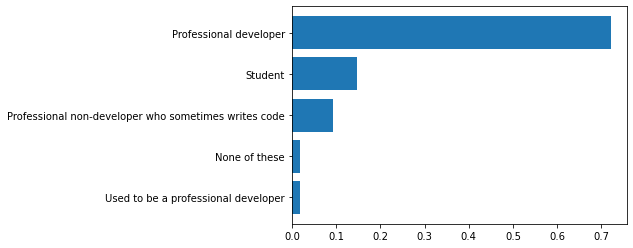

In [432]:
h.viz_freq(df, "Professional", norm=True, asc=True)

I never completed any formal education                               0.007591
Professional degree                                                  0.013349
Primary/elementary school                                            0.021150
I prefer not to answer                                               0.021411
Doctoral degree                                                      0.028845
Secondary school                                                     0.116585
Some college/university study without earning a bachelor's degree    0.150194
Master's degree                                                      0.216888
Bachelor's degree                                                    0.423987
Name: FormalEducation, dtype: float64


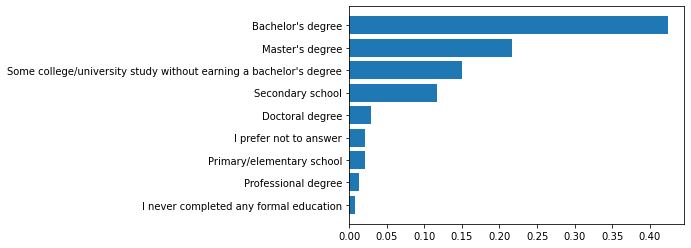

In [433]:
h.viz_freq(df, "FormalEducation", norm=True, asc=True)

Israel            0.017694
Netherlands       0.019527
Australia         0.020888
France            0.027327
Poland            0.036331
Canada            0.045754
Germany           0.069993
United Kingdom    0.074547
India             0.081510
United States     0.228458
Name: Country, dtype: float64


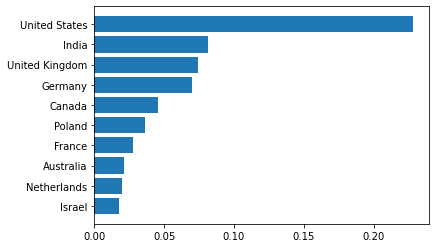

In [434]:
# Country
h.viz_freq(df, "Country", top_k=10, norm=True, asc=True)

## How to break into the field?

The ___following questions___ will be explored in this section.

**1.**  Use the **schema** dataset to answer this question.  Write a function called **get_description** that takes the **schema dataframe** and the **column** as a string, and returns a string of the description for that column.

**2.** In order to understand how to break into the field, we will look at the **CousinEducation** field. Provide a pandas series of the different **CousinEducation** status values in the dataset. 

**3.** Whether some of the individuals might have bias towards their own degrees? 
Analyze elements of the **FormalEducation** column in **df**. 

**4.** Now we would like to find out if the proportion of individuals who completed one of these three programs feel differently than those that did not. Store a dataframe of only the individual's who had **HigherEd** equal to 1 in **ed_1**.  Similarly, store a dataframe of only the **HigherEd** equal to 0 values in **ed_0**.

Notice, you have already created the **HigherEd** column using the check code portion above, so here you only need to subset the dataframe using this newly created column.

**5.** What can you conclude from the above plot?  Change the dictionary to mark **True** for the keys of any statements you can conclude, and **False** for any of the statements you cannot conclude.

In [435]:
# import `schema` data
schema = pd.read_csv('./survey_results_schema.csv')
schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
...,...,...
149,QuestionsInteresting,The questions were interesting
150,QuestionsConfusing,The questions were confusing
151,InterestedAnswers,I'm interested in learning how other developer...
152,Salary,"What is your current annual base salary, befor..."


**1.** Create a function to check full meaning for each feature.

This function has been wrapped into `helper.py`


In [436]:
import importlib
importlib.reload(h)

<module 'helper' from '/Users/alejandrosanz/Downloads/projects_on_GitHub/cases/SurveyDataAnalysis/helper.py'>

In [437]:
h.get_description(schema, 'CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

**2.** Provide a pandas series of the different `CousinEducation` status values in the dataset.

In [438]:
df.CousinEducation.sample(10)

580      Return to college; Get a job as a QA tester; T...
11141                                                  NaN
4423                                                   NaN
12777    Get a job as a QA tester; Take online courses;...
5821                                                   NaN
18542                                                  NaN
10355       Take online courses; Part-time/evening courses
6296                                                   NaN
4517                                                   NaN
5953     Take online courses; Buy books and work throug...
Name: CousinEducation, dtype: object

In [439]:
df.CousinEducation.isna().sum()

12196

**Characteristics of data in `CousinEducation` feature:**

- Multiple items separated by semi-colon
- Lots of null values

So I'm considering to extract each education status from each record and count. If not, we will get the following result which is helpless for our analysis.

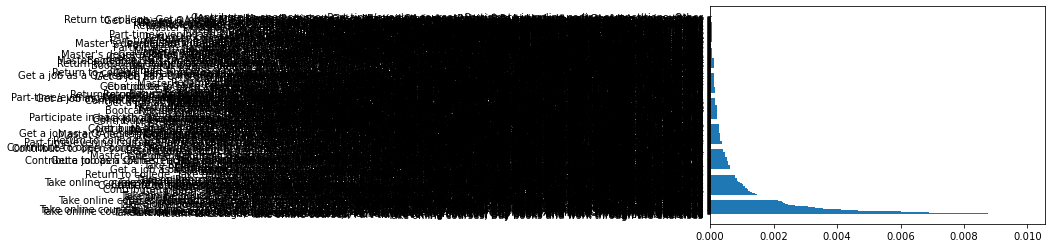

In [440]:
cous_ed_vals = df.CousinEducation.value_counts()/df.shape[0]
plt.barh(y=cous_ed_vals.index, width=cous_ed_vals.values);

In [441]:
couEduSplit = df[df.CousinEducation.notna()].CousinEducation.str.split('; ', n=-1, expand=True)
couEduSplit

,0,1,2,3
7,Get a job as a QA tester,None,None,None
18,Get a job as a QA tester,Conferences/meet-ups,None,None
23,Take online courses,Contribute to open source,Buy books and work through the exercises,Conferences/meet-ups
32,Contribute to open source,Buy books and work through the exercises,Other,None
33,Take online courses,Contribute to open source,Part-time/evening courses,None
...,...,...,...,...
19094,Return to college,Take online courses,Contribute to open source,Part-time/evening courses
19096,Master's degree,Take online courses,Contribute to open source,Conferences/meet-ups
19097,Contribute to open source,Bootcamp,Part-time/evening courses,Conferences/meet-ups
19098,Take online courses,Part-time/evening courses,Participate in online coding competitions,Buy books and work through the exercises


In [442]:
c0 = couEduSplit[0].value_counts().sort_index()
c1 = couEduSplit[1].value_counts().sort_index()
c2 = couEduSplit[2].value_counts().sort_index()
c3 = couEduSplit[3].value_counts().sort_index()

pd.concat([c0, c1, c2, c3], axis=1)

,0,1,2,3
Bootcamp,154,819.0,540.0,56.0
Buy books and work through the exercises,138,640.0,1339.0,1305.0
Conferences/meet-ups,20,106.0,399.0,1013.0
Contribute to open source,552,1369.0,372.0,25.0
Get a job as a QA tester,776,238.0,22.0,NaN
Master's degree,504,268.0,NaN,NaN
None of these,181,NaN,NaN,NaN
Other,91,136.0,143.0,210.0
Part-time/evening courses,114,739.0,1067.0,261.0
Participate in hackathons,40,221.0,391.0,91.0


In [443]:
cc = pd.concat([c0, c1, c2, c3], axis=1).sum(axis=1)
cc

Bootcamp                                     1569.0
Buy books and work through the exercises     3422.0
Conferences/meet-ups                         1538.0
Contribute to open source                    2318.0
Get a job as a QA tester                     1036.0
Master's degree                               772.0
None of these                                 181.0
Other                                         580.0
Part-time/evening courses                    2181.0
Participate in hackathons                     743.0
Participate in online coding competitions     999.0
Return to college                            1469.0
Take online courses                          4440.0
dtype: float64

In [444]:
possible_methods = cc.index.to_list()
possible_methods

['Bootcamp',
 'Buy books and work through the exercises',
 'Conferences/meet-ups',
 'Contribute to open source',
 'Get a job as a QA tester',
 "Master's degree",
 'None of these',
 'Other',
 'Part-time/evening courses',
 'Participate in hackathons',
 'Participate in online coding competitions',
 'Return to college',
 'Take online courses']

In [445]:
cc_relative = (cc/cc.sum()).sort_values()
cc_relative

None of these                                0.008518
Other                                        0.027297
Participate in hackathons                    0.034968
Master's degree                              0.036333
Participate in online coding competitions    0.047016
Get a job as a QA tester                     0.048758
Return to college                            0.069136
Conferences/meet-ups                         0.072383
Bootcamp                                     0.073842
Part-time/evening courses                    0.102645
Contribute to open source                    0.109093
Buy books and work through the exercises     0.161050
Take online courses                          0.208961
dtype: float64

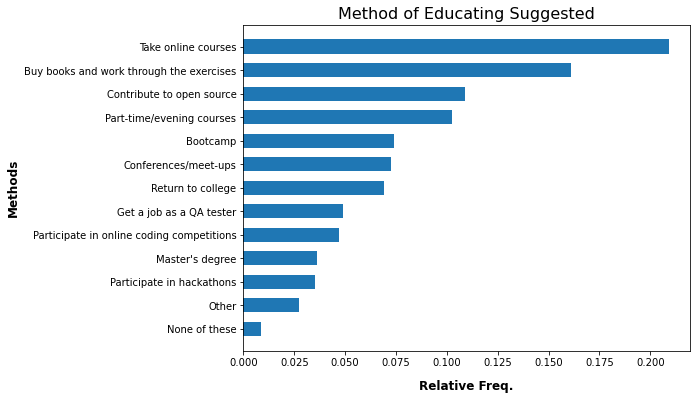

In [446]:
plt.figure(figsize=(8, 6))
plt.barh(cc_relative.index, cc_relative.values, height=.6)

plt.title("Method of Educating Suggested", fontsize=16)
plt.ylabel("Methods", fontweight='bold', fontsize=12)
plt.xlabel('Relative Freq.', fontweight='bold', fontsize=12, labelpad=12);

Take online courses                          0.208961
Buy books and work through the exercises     0.161050
Contribute to open source                    0.109093
Part-time/evening courses                    0.102645
Bootcamp                                     0.073842
Conferences/meet-ups                         0.072383
Return to college                            0.069136
Get a job as a QA tester                     0.048758
Participate in online coding competitions    0.047016
Master's degree                              0.036333
Participate in hackathons                    0.034968
Other                                        0.027297
None of these                                0.008518
dtype: float64

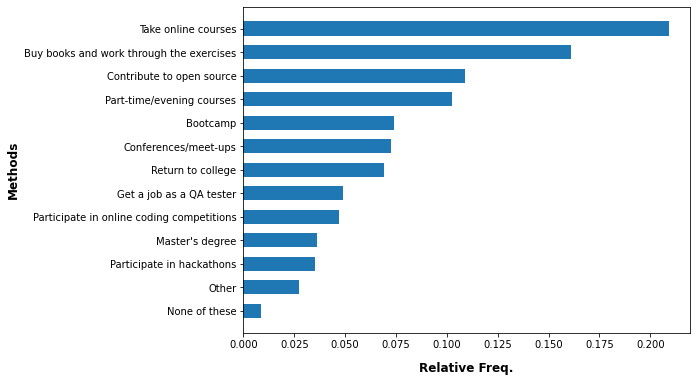

In [447]:
# Wrap the process above into a function in `helper.py`
h.pct_by_method(df)

In [448]:
h.pct_by_method(df, plot=False)

Take online courses                          0.208961
Buy books and work through the exercises     0.161050
Contribute to open source                    0.109093
Part-time/evening courses                    0.102645
Bootcamp                                     0.073842
Conferences/meet-ups                         0.072383
Return to college                            0.069136
Get a job as a QA tester                     0.048758
Participate in online coding competitions    0.047016
Master's degree                              0.036333
Participate in hackathons                    0.034968
Other                                        0.027297
None of these                                0.008518
dtype: float64

**3.** Whether some of the individuals might have bias towards their own degrees?

To answer the question above, we need to do some data processing. Th main idea here is to extract the formal education of the respondents already have had (`FormalEducation`), then compare them with the education they suggested from feature `CousinEducation`.

First of all, by defining a `higher_ed_mapping` function, I encode all the records of `FormalEducation` column which are within `[Master's degree", "Doctoral", "Professional degree]` as `higher_ed` (higher-education-level).

In [449]:
# The following function has been put in `helper.py`
# def higher_ed_mapping(df, edu_levels):
#     df['higher_ed'] = df.FormalEducation.isin(edu_levels).astype('int')
#     prop = df['higher_ed'].mean()
#     return df, prop
    
# df, prop = higher_ed_mapping(df, ["Master's degree", "Doctoral", "Professional degree"])


In [450]:
df, prop = h.higher_ed_mapping(df, ["Master's degree", "Doctoral", "Professional degree"])

In [451]:
# Check the encoding
df[['FormalEducation', 'higher_ed']].sample(20)

,FormalEducation,higher_ed
17145,Secondary school,0
8218,Master's degree,1
10836,Bachelor's degree,0
18676,Bachelor's degree,0
16557,Some college/university study without earning ...,0
18624,Secondary school,0
6582,Some college/university study without earning ...,0
6763,Bachelor's degree,0
621,Bachelor's degree,0
1046,Secondary school,0


In [452]:
# % of respondents who already have higher-edu
print("About {:.2%} of respondents have higher education degrees.".format(prop))

About 23.02% of respondents have higher education degrees.


In [453]:
# # Alternative method using `.apply()` 
# def higher_ed_mapping1(formal_ed_str):
#     if formal_ed_str in ["Master's degree", "Doctoral", "Professional degree"]:
#         return 1
#     else:
#         return 0
    
# # df['higher_ed1'] = df.FormalEducation.apply(higher_ed_mapping1)

In [454]:
# Filter respondents who already have higher edu
df1 = df[df['higher_ed']==1]

# Filter respondents who do not have higher edu
df0 = df[df['higher_ed']==0]

Take online courses                          0.205361
Buy books and work through the exercises     0.163579
Contribute to open source                    0.106031
Part-time/evening courses                    0.101498
Bootcamp                                     0.073118
Return to college                            0.069176
Conferences/meet-ups                         0.067008
Master's degree                              0.055775
Get a job as a QA tester                     0.050847
Participate in online coding competitions    0.041585
Participate in hackathons                    0.032125
Other                                        0.024438
None of these                                0.009460
dtype: float64

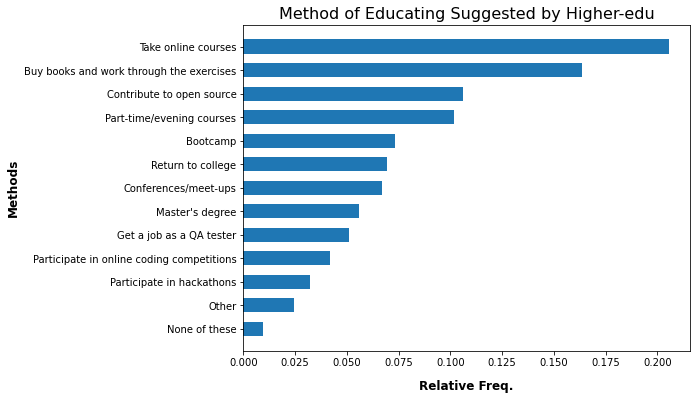

In [455]:
# Check df1
h.pct_by_method(df1, "Method of Educating Suggested by Higher-edu", plot=True)

Take online courses                          0.210090
Buy books and work through the exercises     0.160257
Contribute to open source                    0.110053
Part-time/evening courses                    0.103005
Bootcamp                                     0.074069
Conferences/meet-ups                         0.074069
Return to college                            0.069123
Participate in online coding competitions    0.048720
Get a job as a QA tester                     0.048102
Participate in hackathons                    0.035860
Master's degree                              0.030234
Other                                        0.028193
None of these                                0.008223
dtype: float64

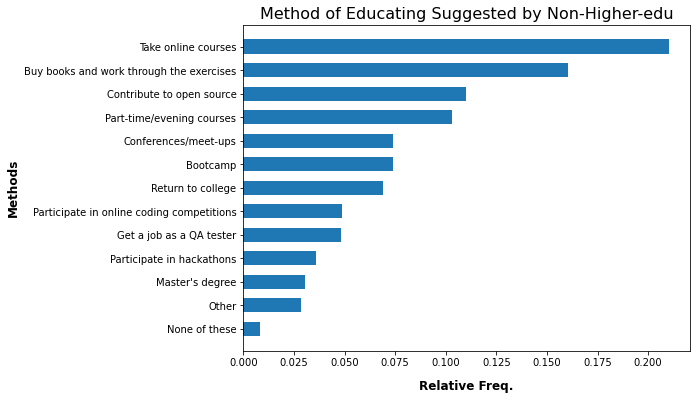

In [456]:
# Check df0
h.pct_by_method(df0, "Method of Educating Suggested by Non-Higher-edu", plot=True)

In [457]:
ed1_pct = h.pct_by_method(df1, "Method of Educating Suggested by higher1", plot=False)
ed0_pct = h.pct_by_method(df0, "Method of Educating Suggested by higher0", plot=False)

In [458]:
cmb_df = pd.concat([ed1_pct, ed0_pct], axis=1)
cmb_df.rename(columns={0: 'ed1_pct', 1: 'ed0_pct'}, inplace=True)
cmb_df['diff_ed'] = cmb_df.ed1_pct - cmb_df.ed0_pct

In [459]:
cmb_df

,ed1_pct,ed0_pct,diff_ed
Take online courses,0.205361,0.210090,-0.004730
Buy books and work through the exercises,0.163579,0.160257,0.003322
Contribute to open source,0.106031,0.110053,-0.004022
Part-time/evening courses,0.101498,0.103005,-0.001507
Bootcamp,0.073118,0.074069,-0.000952
Return to college,0.069176,0.069123,0.000053
Conferences/meet-ups,0.067008,0.074069,-0.007061
Master's degree,0.055775,0.030234,0.025541
Get a job as a QA tester,0.050847,0.048102,0.002746
Participate in online coding competitions,0.041585,0.048720,-0.007136


In [460]:
cmb_df.style.bar(subset=['diff_ed'], align='zero', color=['#d65f5f', '#5fba7d'])

,ed1_pct,ed0_pct,diff_ed
Take online courses,0.205361,0.210090,-0.004730
Buy books and work through the exercises,0.163579,0.160257,0.003322
Contribute to open source,0.106031,0.110053,-0.004022
Part-time/evening courses,0.101498,0.103005,-0.001507
Bootcamp,0.073118,0.074069,-0.000952
Return to college,0.069176,0.069123,0.000053
Conferences/meet-ups,0.067008,0.074069,-0.007061
Master's degree,0.055775,0.030234,0.025541
Get a job as a QA tester,0.050847,0.048102,0.002746
Participate in online coding competitions,0.041585,0.048720,-0.007136


**Conclusions:**

From the analysis above, we can come to the conlusions below:

- Regardless of formal education, **online courses** are the top suggested form of education.
- Those with higher formal education suggest it more than those who do not have it. (As we can see respondents who have a **Master's degree** suggested a higher degree about **2.5% more** than those who haven't.)
- However, the rest of methods for educating are less than 1% between suggestions of the two groups for all forms of education.
- As there are a number of ways to become a developer, it is **NOT** a must to get a higher level of formal education (No one of the categories of degree labeled as 1.)

## Explore `Job Satisfaction` Feature

The ___following questions___ will be explored in this section.

**1.** The proportion of missing values in the Job Satisfaction column.

**2.** According to EmploymentStatus, which group has the highest average job satisfaction?

**3.** In general, do smaller companies appear to have employees with higher job satisfaction?

**4.** Do individuals who program outside of work appear to have higher JobSatisfaction?

**5.** Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?

**6.** A friend says a Doctoral degree increases the chance of having job you like, does this seem true?

**Q1:** The proportion of missing values in the Job Satisfaction column.

In [461]:
missing_pct = df.JobSatisfaction.isna().mean()
print("Conclusion: {:.2%} of values in \033[1mJob Satisfaction\033[0m column are missing.".format(missing_pct))

Conclusion: 20.15% of values in Job Satisfaction column are missing.


**Q2:** According to EmploymentStatus, which group has the highest average job satisfaction?

In [462]:
# Filter out missing values in `JobSatisfaction`
job_satisfaction_notna = df[df.JobSatisfaction.notna()]

In [463]:
importlib.reload(h)

<module 'helper' from '/Users/alejandrosanz/Downloads/projects_on_GitHub/cases/SurveyDataAnalysis/helper.py'>

In [464]:
# See `helper.py`
# def job_satisfaction_byGroup(df, by_col):
#     res_srs = df.groupby(by_col).JobSatisfaction.mean().sort_values(ascending=False)
#     res_df = res_srs.rename('Avg_JobSatisfaction').to_frame()
#     print(res_df)

In [465]:
h.job_satisfaction_byGroup(job_satisfaction_notna, 'EmploymentStatus')

                                                    Avg_JobSatisfaction
EmploymentStatus                                                       
Independent contractor, freelancer, or self-emp...             7.231985
Employed full-time                                             6.980608
Employed part-time                                             6.846154


**Conclusion:** `Independent contractor, freelancer, or self-employed` seems to has the highest average job satisfaction.

**Q3:** In general, do smaller companies appear to have employees with higher job satisfaction?

In [466]:
# Explore company size type
df.CompanySize.dtype

dtype('O')

In [467]:
df.CompanySize.value_counts()

20 to 99 employees          3214
100 to 499 employees        2858
10,000 or more employees    1998
10 to 19 employees          1544
1,000 to 4,999 employees    1482
Fewer than 10 employees     1456
500 to 999 employees         946
5,000 to 9,999 employees     606
I don't know                 311
I prefer not to answer       238
Name: CompanySize, dtype: int64

In [468]:
# Designated order for company size
comp_size_list = ['Fewer than 10 employees', '10 to 19 employees', \
                 '20 to 99 employees', '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', \
                 '5,000 to 9,999 employees', '10,000 or more employees', "I don't know", "I prefer not to answer"]

# Convert dtype of `CompanySize` to `pd.CategoricalDtype`
h.ord_cat_convert(df, 'CompanySize', comp_size_list)

In [469]:
# Validate data type after conversion
df.CompanySize.dtype

CategoricalDtype(categories=['Fewer than 10 employees', '10 to 19 employees',
                  '20 to 99 employees', '100 to 499 employees',
                  '500 to 999 employees', '1,000 to 4,999 employees',
                  '5,000 to 9,999 employees', '10,000 or more employees',
                  'I don't know', 'I prefer not to answer'],
, ordered=True)

In [470]:
job_satisfaction_notna.groupby('CompanySize').JobSatisfaction.mean()

CompanySize
1,000 to 4,999 employees    6.908506
10 to 19 employees          7.035739
10,000 or more employees    6.793617
100 to 499 employees        7.029324
20 to 99 employees          6.997039
5,000 to 9,999 employees    6.832155
500 to 999 employees        7.029967
Fewer than 10 employees     7.025719
I don't know                7.054622
I prefer not to answer      7.284946
Name: JobSatisfaction, dtype: float64

<AxesSubplot:ylabel='CompanySize'>

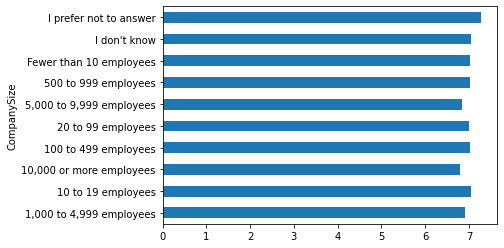

In [471]:
job_satisfaction_notna.groupby('CompanySize').JobSatisfaction.mean().plot(kind='barh')

**Conclusion:** From the bar plot above, in general, smaller companies appear to have employees with higher job satisfaction, especially for those under 1,000 employees.

**Q4.** Do individuals who program outside of work appear to have higher JobSatisfaction?

**ANS:** Yes.

In [472]:
h.get_description(schema, 'ProgramHobby')

'Do you program as a hobby or contribute to open source projects?'

In [473]:
h.job_satisfaction_byGroup(job_satisfaction_notna, 'ProgramHobby')

                                           Avg_JobSatisfaction
ProgramHobby                                                  
Yes, both                                             7.189316
Yes, I contribute to open source projects             7.158649
Yes, I program as a hobby                             6.927150
No                                                    6.874806


**Q5.** Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?

**ANS:** Yes.

In [474]:
h.get_description(schema, 'HomeRemote')

'How often do you work from home or remotely?'

In [475]:
h.job_satisfaction_byGroup(job_satisfaction_notna, 'HomeRemote')

                                                    Avg_JobSatisfaction
HomeRemote                                                             
All or almost all the time (I'm full-time remote)              7.405421
Less than half the time, but at least one day e...             7.143786
About half the time                                            7.125737
A few days each month                                          7.096694
More than half, but not all, the time                          6.973684
It's complicated                                               6.942053
Never                                                          6.697127


**Q6.** A friend says a Doctoral degree increases the chance of having job you like, does this seem true?

**ANS:** Yes.

In [476]:
h.get_description(schema, 'FormalEducation')

"Which of the following best describes the highest level of formal education that you've completed?"

In [477]:
h.job_satisfaction_byGroup(job_satisfaction_notna, 'FormalEducation')

                                                    Avg_JobSatisfaction
FormalEducation                                                        
Doctoral degree                                                7.438492
Secondary school                                               7.219512
I prefer not to answer                                         7.211679
Some college/university study without earning a...             7.151268
Professional degree                                            7.075893
I never completed any formal education                         7.000000
Master's degree                                                6.977356
Primary/elementary school                                      6.946237
Bachelor's degree                                              6.900293


## Predict `Salary`

### Preparatory 1: Explore Numeric Features

In this dataset, I use the following code to filter the numeric variables only:

```python
df.select_dtypes(include=['int64', 'float64'])

```

In [478]:
num_vars = df.select_dtypes(include=['int64', 'float64']).columns
num_vars

Index(['Respondent', 'CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek',
       'StackOverflowSatisfaction', 'Salary', 'ExpectedSalary', 'higher_ed'],
      dtype='object')

In [479]:
# Check missingness
df[num_vars].isna().sum().sort_values(ascending=False)

ExpectedSalary               18284
Salary                       14093
HoursPerWeek                 11381
StackOverflowSatisfaction     5650
JobSatisfaction               3849
CareerSatisfaction            3000
Respondent                       0
higher_ed                        0
dtype: int64

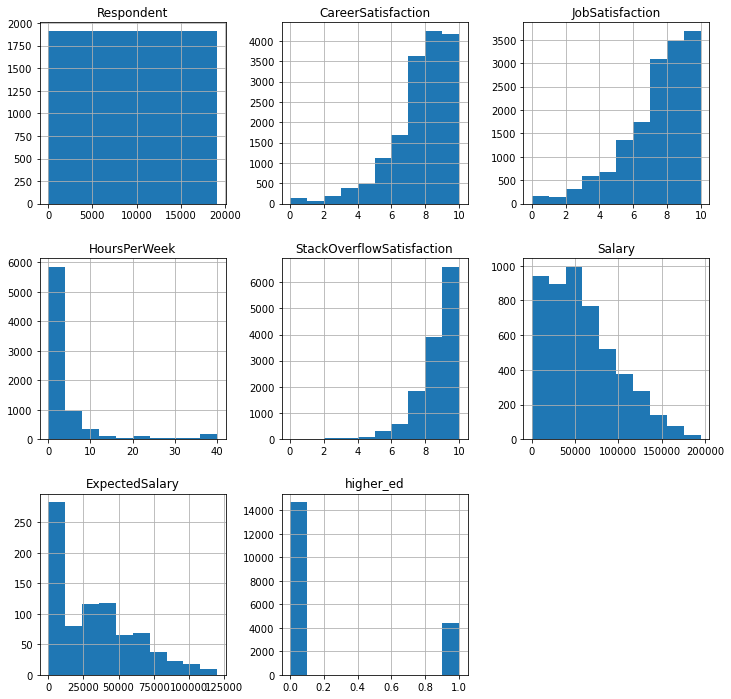

In [480]:
# Data distribution by histogram
df[num_vars].hist(figsize=(12,12));

In [481]:
# range of `JobSatisfaction`
df.JobSatisfaction.min(), df.JobSatisfaction.max()

(0.0, 10.0)

In [482]:
# Explore spread of values in each feature
std_dict = dict()

for i in num_vars:
    std_dict[i] = df[i].std()

# Sort by dict values
sorted(std_dict.items(), key=lambda x: x[1], reverse=True)

[('Salary', 40753.38498558863),
 ('ExpectedSalary', 28543.87727378644),
 ('Respondent', 5514.416756708425),
 ('HoursPerWeek', 7.330691388026137),
 ('JobSatisfaction', 2.1286481476457646),
 ('CareerSatisfaction', 1.919329890359761),
 ('StackOverflowSatisfaction', 1.4055456367983585),
 ('higher_ed', 0.4209959199046422)]

In [483]:
import seaborn as sns

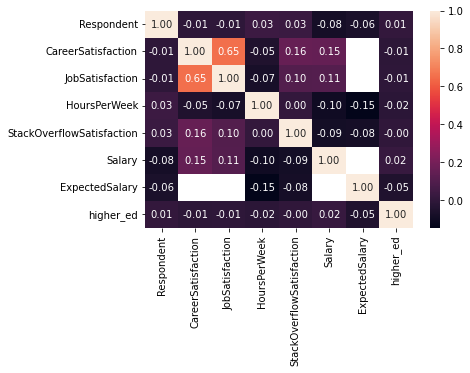

In [484]:
sns.heatmap(df[num_vars].corr(), annot=True, fmt='.2f');

**Conclusions:**

From the above, we can see:
1. Numeric features for this dataset includes: 
    - `Respondent`
    - `CareerSatisfaction`
    - `JobSatisfaction`
    - `HoursPerWeek`
    - `StackOverflowSatisfaction`
    - `Salary`
    - `ExpectedSalary`
    
    
2. The maximum Satisfaction on the scales for the survey is **10**.

3. The column with the most missing values is `ExpectedSalary`.

4. The variable with the highest spread of values is `Salary`.

5. `CareerSatisfaction` has the strongest correlation with `Salary`.

6. Negative correlation is suggested between hours worked and salary (`HoursPerWeek` vs. `Salary`)

7. Data in the `ExpectedSalary` column meant missing data in three other columns.

In the following, numeric variables excluding `Respondent` and `ExpectedSalary` are used as dependent varaibles.

### Preparatory 2: Data Preprocessing

**1.** Dealing with Missing Values.

**2.** Imputation Techniques.

**3.** Dealing with Categorical Features.


#### 1. Dealing with (Removing/Dropping) Missing Values.

In [485]:
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]

In [486]:
# Non-null values in `Salary` column
notna_sal_pct = num_vars.Salary.notna().mean()
notna_sal_freq = num_vars.Salary.notna().sum()
print("There are {0:,} repsondents reporting their salaries, covering only {1:.2%} of the whole.".format(
                                                                                                notna_sal_freq,
                                                                                                notna_sal_pct))

There are 5,009 repsondents reporting their salaries, covering only 26.22% of the whole.


In [487]:
# If there is a null-value in `Salary`, the whole row will be removed
sal_rm = num_vars.dropna(subset=['Salary'])

In [488]:
X = sal_rm.drop(columns=['Salary'])
y = sal_rm['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
lm_model = LinearRegression(normalize=True)

try:
    lm_model.fit(X_train, y_train)
    
except:
    print("Ooops! It breaks!")

Ooops! It breaks!


In [489]:
# If there is a nan in a cell, then remove that record (row) immediately
all_rm = num_vars.dropna()
all_rm.shape

(2147, 5)

In [490]:
X_2 = all_rm.drop(columns=['Salary'])
y_2 = all_rm['Salary']

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2 , test_size=.30, random_state=42)
lm_2_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_2_train, y_2_train)
except:
    print("Oh no! It doesn't work!!!")

In [491]:
# Prediction
y_test_preds = lm_2_model.predict(X_2_test)
r2_test = r2_score(y_2_test, y_test_preds)

r2_test

0.019170661803761924

In [492]:
y_2_test.shape

(645,)

In [493]:
y_2_test.shape[0]/df.Salary.notna().sum()

0.12876821720902376

In [494]:
print("The r-squared score for this model was {0:.4f} on {1} values.".format(r2_test, y_2_test.shape[0]))

The r-squared score for this model was 0.0192 on 645 values.


In [495]:
# If an individual does not rate stackoverflow, but has a salary
sal_avaliable1 = num_vars[(num_vars.Salary.notnull()) & (num_vars.StackOverflowSatisfaction.isnull())].shape
sal_avaliable1

(333, 5)

In [496]:
# If an individual does not have a a job satisfaction, but has a salary
sal_avaliable2 = num_vars[(num_vars.Salary.notna()) & (num_vars.JobSatisfaction.isna())].shape
sal_avaliable2

(14, 5)

In [497]:
out_str = ("* {} available salary values will be wasted "
          "if an individual does not rate stackoverflow, but has a salary."
           "\n* {} available salary values will be wasted "
           "if an individual does not have a a job satisfaction, but has a salary."
          )
print(out_str.format(sal_avaliable1[0], sal_avaliable2[0]))

* 333 available salary values will be wasted if an individual does not rate stackoverflow, but has a salary.
* 14 available salary values will be wasted if an individual does not have a a job satisfaction, but has a salary.


***Comments:***

1. There are **5009** reported salaries in the original dataset.
2. The number of test salaries predicted using our 2nd model is **645**, this is bad because it only predicts ***12.88%*** of the `Salary` values available.
3. Our 1st model collapsed as there are still missing values in dependent variables. (Note we only drop the `nan` in `Salary` column).
4. Our 2nd model works but it still has some limitations:
    - If an individual does not rate stackoverflow, but has a salary, the 2nd still will break.
    - If an individual does not have a a job satisfaction, but has a salary, the 2nd still will break.
5. So we need to figure out some ways to deal with these situations (Missing Values) above.

#### 2. Impute Missing Values

- Impute with mean for numeric features.

- Impute mode for categorical feature or numeric feature with outliers.

**Example:**

In [498]:
exp_df = pd.DataFrame({'A':[np.nan, 2, np.nan, 0, 7, 10, 15],
                   'B':[3, 4, 5, 1, 2, 3, 5],
                   'C':[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                   'D':[np.nan, True, np.nan, False, True, False, np.nan],
                   'E':['Yes', 'No', 'Maybe', np.nan, np.nan, 'Yes', np.nan]})

exp_df

,A,B,C,D,E
0,NaN,3,NaN,NaN,Yes
1,2.0,4,NaN,True,No
2,NaN,5,NaN,NaN,Maybe
3,0.0,1,NaN,False,NaN
4,7.0,2,NaN,True,NaN
5,10.0,3,NaN,False,Yes
6,15.0,5,NaN,NaN,NaN


In [499]:
exp_df_rm = exp_df.dropna(how='all', axis=1)
exp_df_rm

,A,B,D,E
0,NaN,3,NaN,Yes
1,2.0,4,True,No
2,NaN,5,NaN,Maybe
3,0.0,1,False,NaN
4,7.0,2,True,NaN
5,10.0,3,False,Yes
6,15.0,5,NaN,NaN


In [500]:
fill_mean = lambda col: col.fillna(col.mean())

In [501]:
exp_df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       7 non-null      int64  
 2   D       4 non-null      object 
 3   E       4 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 352.0+ bytes


In [502]:
# Only numeric feature has mean values
fill_mean(exp_df_rm.select_dtypes(['int64', 'float64']))

,A,B
0,6.8,3
1,2.0,4
2,6.8,5
3,0.0,1
4,7.0,2
5,10.0,3
6,15.0,5


In [503]:
fill_mode = lambda col: col.fillna(col.mode()[0])

In [504]:
# mode value for each feature (column)
exp_df_rm.mode()

,A,B,D,E
0,0.0,3.0,False,Yes
1,2.0,5.0,True,NaN
2,7.0,NaN,NaN,NaN
3,10.0,NaN,NaN,NaN
4,15.0,NaN,NaN,NaN


We can see from above, the first `mode` value for each feature is the element in the first row respectively.

In [505]:
# Before imputation
exp_df_rm

,A,B,D,E
0,NaN,3,NaN,Yes
1,2.0,4,True,No
2,NaN,5,NaN,Maybe
3,0.0,1,False,NaN
4,7.0,2,True,NaN
5,10.0,3,False,Yes
6,15.0,5,NaN,NaN


In [506]:
# After imputation
exp_df_rm.apply(fill_mode)

,A,B,D,E
0,0.0,3,False,Yes
1,2.0,4,True,No
2,0.0,5,False,Maybe
3,0.0,1,False,Yes
4,7.0,2,True,Yes
5,10.0,3,False,Yes
6,15.0,5,False,Yes


As we can see, None of the values in the first column appeared more than once, and 0 was imputed for all of the NaN values.  There were an even number of True and False values, and False was imputed for all the NaN values.

In [507]:
num_vars.columns

Index(['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction',
       'StackOverflowSatisfaction'],
      dtype='object')

In [508]:
fill_sal_rm = sal_rm.apply(fill_mean)
fill_sal_rm.shape

(5009, 5)

In [509]:
X_3 = fill_sal_rm.drop(columns=['Salary'])
y_3 = fill_sal_rm['Salary']

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3 , test_size=.30, random_state=42)
lm_3_model = LinearRegression(normalize=True)

lm_3_model.fit(X_3_train, y_3_train)

y_3_test_preds = lm_3_model.predict(X_3_test)
r2_test3 = r2_score(y_3_test, y_3_test_preds)

In [510]:
print("The r-squared score for this model was {0:.4f} on {1} values.".format(r2_test3, y_3_test.shape[0]))

The r-squared score for this model was 0.0326 on 1503 values.


**Comment:**

This model still isn't great. Let's see if we can't improve it by using some of the other columns in the dataset.

### Preparatory 3: Explore categorical variables

In [511]:
# Find out categorical variables
cat_vars = df.select_dtypes('object').columns
print("There are {} vategorical variables in the dataset.".format(len(cat_vars)))

There are 146 vategorical variables in the dataset.


In [512]:
# categorical variables that do not have nan values
h.cat_na_filter(df, bound=0, print_cols=True)

There are 6 categorical variables with no misisng values.
['Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation']


In [513]:
importlib.reload(h)

<module 'helper' from '/Users/alejandrosanz/Downloads/projects_on_GitHub/cases/SurveyDataAnalysis/helper.py'>

In [514]:
# categorical variables with more than 50% of nan values
h.cat_na_filter(df, bound=0.5)

There are 49 categorical variables with with more than 50.00% of missing values.


In [515]:
# categorical variables with more than 75% of nan values
h.cat_na_filter(df, bound=0.75)

There are 13 categorical variables with with more than 75.00% of missing values.


**Preparatory: One-Hot Encodings Example**

In [516]:
dummy_var_df = pd.DataFrame({'col1': ['a', 'a', 'b', 'b', 'a', np.nan, 'b', np.nan],
                             'col2': [1, np.nan, 3, np.nan, 5, 6, 7, 8] 
})
                            
dummy_var_df

,col1,col2
0,a,1.0
1,a,NaN
2,b,3.0
3,b,NaN
4,a,5.0
5,NaN,6.0
6,b,7.0
7,NaN,8.0


In [517]:
pd.get_dummies(dummy_var_df)

,col2,col1_a,col1_b
0,1.0,1,0
1,NaN,1,0
2,3.0,0,1
3,NaN,0,1
4,5.0,1,0
5,6.0,0,0
6,7.0,0,1
7,8.0,0,0


___Note:___

- `col1` was one-hot encoded.
- `pd.get_dummies()` only choose categorical variables to be one-hot encoded automatically.
- `pd.get_dummies()` encodes `nan` as 0 by default.

In [518]:
pd.get_dummies(dummy_var_df.col1, dummy_na=True)

,a,b,NaN
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
5,0,0,1
6,0,1,0
7,0,0,1


___Note:___

We can also use **get_dummies** to encode **NaN** values as their own dummy coded column using the **dummy_na** argument.  Often these **NaN** values are also informative, but we are not capturing them by leaving them as 0 in every column of the model.

**Creat dummy dataframe on the SurveyData**

In [519]:
## Already wrapped-up in helper.py
# def create_dummy_df(df, cat_cols, dummy_na=True):
#     '''Create dummied dataframe by one-hot encoding.
    
#     INPUT:
#     df - pandas dataframe with categorical variables you want to dummy
#     cat_cols - list of strings that are associated with names of the categorical columns
#     dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
#     OUTPUT:
#     df - a new dataframe that has the following characteristics:
#             1. contains all columns that were not specified as categorical
#             2. removes all the original columns in cat_cols
#             3. dummy columns for each of the categorical columns in cat_cols
#             4. if dummy_na is True - it also contains dummy columns for the NaN values
#             5. Use a prefix of the column name with an underscore (_) for separating 
#     '''
#     for col in  cat_cols:
#         # for each cat add dummy var, drop original column
#         df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], 
#                                                              prefix=col, 
#                                                              prefix_sep='_', 
#                                                              drop_first=True, 
#                                                              dummy_na=dummy_na)], axis=1)
#     return df

In [520]:
df = pd.read_csv('./survey_results_public.csv')
# Drop the row if `Salary` column contains np.nan
sal_rm = df.dropna(subset=['Salary'])

# Filter categorical variables only
cat_vars = sal_rm.select_dtypes('object').columns

# One-hot encoding
df_new = h.create_dummy_df(sal_rm, cat_vars, dummy_na=False)

In [521]:
out_str = """
Shape of DataFrame:
  Before One-Hot Encoding: {}
   After One-Hot Encoding: {}
"""
print(out_str.format(sal_rm.shape, df_new.shape))


Shape of DataFrame:
  Before One-Hot Encoding: (5009, 154)
   After One-Hot Encoding: (5009, 11938)



In the following, all steps above were wrapped up in `help.py`. (___See clean_fit_linear_mod(...) for detail.___)

- row records with null values in `Salary` have been dropped.
- empty columns have been dropped.
- numeric variables have been imputed with mean values.
- categorical variables have been one-hot encoded

In [522]:
train_score, test_score, _, _, _, _, _ = h.clean_fit_linear_mod(df, 'Salary', dummy_na=False)

In [523]:
out_str = "\u2022 The r-squared on the training data was {0}.\n\u2022 The r-squared on the test data was {1: .3f}."
print(out_str.format(train_score, test_score))

• The r-squared on the training data was 1.0.
• The r-squared on the test data was  0.453.


In order to understand how well our linear model (lm_model) fit the dataset, 

we first needed to split our data into train and test data sets. 

Then we were able to fit our linear model (lm_model) on the X_train and y_train. 

We could then predict using our linear model (lm_model) by providing the linear model the X_test for it to make predictions. These predictions were for y_test. 

By looking at the train_score, it looked like we were doing awesome because it was 1! However, looking at the test_score suggested our model was not extending well. The purpose of this notebook will be to see how well we can get our model to extend to new data. 

This problem where our data fits the training data well, but does not perform well on test data is commonly known as ___overfitting___.

---

___Normally,___ the following methods can help us combat overfitting:
- **Method 1**: add interactions, quadratics, cubics, and other higher order terms.
- **Method 2**: fit the model many times with different rows, then average the responses.
- **Method 3**: subset the features used for fitting the model each time.
- ...

For **Method 1**, in this case, it is not likely that having more complex features will help us.  The model is already forming too complex of a relationship to generalize to new data.


For **Method 2**, fitting the model on different rows and ctually a common technique for combatting overfitting.  It relates to an idea known as ___bootstrapping___.


For **Method 3**, subsetting the features is actually a common way to combat overfitting.  This type of feature reduction is done in stochastic gradient methods related to gradient boosting and random forest methods.

In [524]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [525]:
df.select_dtypes('int64')

,Respondent
0,1
1,2
2,3
3,4
4,5
...,...
19097,19098
19098,19099
19099,19100
19100,19101


In [526]:
df = pd.read_csv('./survey_results_public.csv')

In [527]:
def clean_data(df):
    df_clean = df.copy()
    df = df.dropna(subset=['Salary'])
    
    X = df.drop(columns=['Respondent', 'ExpectedSalary', 'Salary'])
    
    num_vars = X.select_dtypes('float').columns
    for num_var in num_vars:
        X[num_var].fillna(X[num_var].mean(), inplace=True)
    
    cat_vars = X.select_dtypes('object').columns
    for cat_var in cat_vars:
        X = pd.concat([X.drop(columns=cat_var), pd.get_dummies(X[cat_var], drop_first=True, prefix=cat_var)], axis=1)
        
    
    y = df['Salary']
    
    return X, y

In [528]:
X, y = clean_data(df)

In [529]:
X.sum().sort_values(ascending=False)[:20]

StackOverflowSatisfaction                                  42289.414457
CareerSatisfaction                                         37742.349070
JobSatisfaction                                            35187.347548
HoursPerWeek                                               12259.099474
University_No                                               4406.000000
Gender_Male                                                 4154.000000
StackOverflowMetaChat_Haven't done at all                   3858.000000
PronounceGIF_With a hard "g," like "gift"                   3644.000000
Race_White or of European descent                           3474.000000
StackOverflowCompanyPage_Haven't done at all                3455.000000
StackOverflowJobSearch_Haven't done at all                  3102.000000
StackOverflowNewQuestion_Haven't done at all                3026.000000
AuditoryEnvironment_Turn on some music                      2877.000000
QuestionsConfusing_Disagree                                 2851

In [530]:
X.dtypes

CareerSatisfaction                                        float64
JobSatisfaction                                           float64
HoursPerWeek                                              float64
StackOverflowSatisfaction                                 float64
ProgramHobby_Yes, I contribute to open source projects      uint8
                                                           ...   
QuestionsConfusing_Strongly disagree                        uint8
InterestedAnswers_Disagree                                  uint8
InterestedAnswers_Somewhat agree                            uint8
InterestedAnswers_Strongly agree                            uint8
InterestedAnswers_Strongly disagree                         uint8
Length: 11935, dtype: object

In [531]:
X.dtypes.unique()

array([dtype('float64'), dtype('uint8')], dtype=object)

In [532]:
cat1 = X.select_dtypes('uint8').columns

In [533]:
X[cat1].sum().min(), X[cat1].sum().max()

(1, 4406)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffe22c7ded0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffe1d654b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffe9c6da690>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffe2263bcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffe2263b0d0>],
 'means': []}

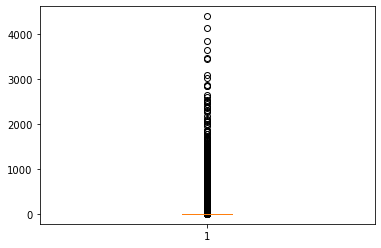

In [534]:
plt.boxplot(X[cat1].sum())

In [535]:
X.shape

(5009, 11935)

In [536]:
y.shape

(5009,)

In [537]:
cuts = [4000, 3500, 2500, 1500, 1000, 750, 500, 350,200, 100, 70, 50, 30, 25]

Best Cut Number: 30.
Optimal Number of Features: 872.
Test Score(Highest) on Best Cut: 0.694.
Corresponding Train Score: 0.821.


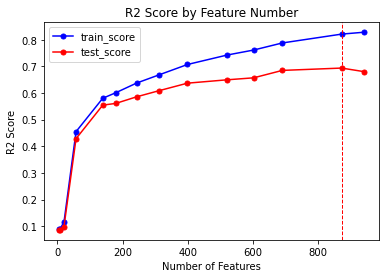

In [538]:
X_train, _, _, _, lm = h.find_optimal_lm(X, y, cuts)

___Comments:___

From the above,we can see,
1. The optimal number of features based on the results is **872**.
2. The model( optimal) we should implement in practice has a train rsquared of **0.821**.
3. The model( optimal) we should implement in practice has a test rsquared of **0.694**.
4. If we were to allow the number of features to continue to **increase**, we would likely have a better rsquared for the training data.

The default penalty on coefficients using linear regression in sklearn is a **ridge** (also known as an **L2**) penalty. Because of this penalty, and that all the variables were normalized, we can look at the size of the coefficients in the model as an indication of the impact of each variable on the salary. The larger the coefficient, the larger the expected impact on salary.

In [539]:
# Analyze the impact of each predictor on predicting the `salary`
h.coef_weights(lm, X_train).head(30)

,feature_names,weights,abs_weights
39,Country_United States,54790.149088,54790.149088
27,Country_Norway,51646.104208,51646.104208
359,Currency_Swiss francs,41980.217723,41980.217723
7,Country_Australia,40036.771478,40036.771478
14,Country_Denmark,35220.409157,35220.409157
22,Country_Israel,33912.797956,33912.797956
113,YearsCodedJob_18 to 19 years,33870.804225,33870.804225
26,Country_New Zealand,29819.029774,29819.029774
116,YearsCodedJob_20 or more years,29125.842235,29125.842235
37,Country_Ukraine,-28097.193011,28097.193011


___Conclusions:___

From the top-20 weights of importance matrix above, we can see,
1. `Country` appears to be one of the top indicators for `Salary`.
2. **How long** an individual has been programming appears to be one of the top indicators for `Salary`.
3. However, how long an individual has been programming ___does not___ have a positive relationship with `Salary`.
4. `Gender` ___does not___ appear to be one of the indicators for `Salary`.